In [2]:
import pandas as pd

train_df = pd.read_csv('/content/train (2).csv')

test_df = pd.read_csv('/content/test (1).csv')

y = train_df['y']
X = train_df.drop('y', axis=1)

print("First 5 rows of train_df (features):")
print(X.head())

print("\nColumns in train_df (features):")
print(X.columns)

print("\nFirst 5 rows of test_df:")
print(test_df.head())

print("\nColumns in test_df:")
print(test_df.columns)

First 5 rows of train_df (features):
   id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   25   aug       117         3     -1         0  unknown  
1   unknown   18   jun       185         1     -1         0  unknown  
2   unknown   14   may       111         2     -1         0  unknown  
3   unknown   28   may        10         2     -1         0  unknown  
4  cellular    3   feb       902         1     -1         0  unknown  

Columns in train_df (features):
Index(['id', 'age', 'job', 'marital', 'ed

In [3]:
import numpy as np

y = y.replace({'yes': 1, 'no': 0})

y_mode = y.mode()[0]
y = y.fillna(y_mode).astype(int)

print("Target variable 'y' after conversion and NaN imputation:")
print(y.value_counts())
print(f"Number of NaN in y after imputation: {y.isnull().sum()}")

Target variable 'y' after conversion and NaN imputation:
y
0    659512
1     90488
Name: count, dtype: int64
Number of NaN in y after imputation: 0


In [4]:
missing_threshold = 0.7

missing_values_X = X.isnull().sum()
percentage_missing_X = (missing_values_X / len(X)) * 100
print("\nMissing values in X (training features):\n")
print(percentage_missing_X[percentage_missing_X > 0].sort_values(ascending=False))

missing_values_test = test_df.isnull().sum()
percentage_missing_test = (missing_values_test / len(test_df)) * 100
print("\nMissing values in test_df (testing data):\n")
print(percentage_missing_test[percentage_missing_test > 0].sort_values(ascending=False))

columns_to_drop_X = percentage_missing_X[percentage_missing_X > (missing_threshold * 100)].index.tolist()
if columns_to_drop_X:
    X = X.drop(columns=columns_to_drop_X)
    print(f"\nDropped columns from X due to high missing values: {columns_to_drop_X}")
else:
    print("\nNo columns dropped from X due to high missing values.")

columns_to_drop_test = percentage_missing_test[percentage_missing_test > (missing_threshold * 100)].index.tolist()
if columns_to_drop_test:
    test_df = test_df.drop(columns=columns_to_drop_test)
    print(f"\nDropped columns from test_df due to high missing values: {columns_to_drop_test}")
else:
    print("\nNo columns dropped from test_df due to high missing values.")

print("\nNumber of NaN values after potential column drops in X:")
print(X.isnull().sum().sum())
print("\nNumber of NaN values after potential column drops in test_df:")
print(test_df.isnull().sum().sum())



Missing values in X (training features):

Series([], dtype: float64)

Missing values in test_df (testing data):

Series([], dtype: float64)

No columns dropped from X due to high missing values.

No columns dropped from test_df due to high missing values.

Number of NaN values after potential column drops in X:
0

Number of NaN values after potential column drops in test_df:
0


In [5]:
import numpy as np

for col in X.columns:
    if X[col].isnull().any():
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].mean())
        else:
            X[col] = X[col].fillna(X[col].mode()[0])

for col in test_df.columns:
    if test_df[col].isnull().any():
        if test_df[col].dtype in ['int64', 'float64']:
            test_df[col] = test_df[col].fillna(test_df[col].mean())
        else:
            test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

print("\nNumber of NaN values after imputation in X:")
print(X.isnull().sum().sum())
print("\nNumber of NaN values after imputation in test_df:")
print(test_df.isnull().sum().sum())
print("\nNumber of NaN values in y (should be 0):")
print(y.isnull().sum())



Number of NaN values after imputation in X:
0

Number of NaN values after imputation in test_df:
0

Number of NaN values in y (should be 0):
0


In [6]:
import pandas as pd

categorical_cols_X = X.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id' in categorical_cols_X:
    categorical_cols_X.remove('id')

categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id' in categorical_cols_test:
    categorical_cols_test.remove('id')

X_encoded = pd.get_dummies(X, columns=categorical_cols_X, drop_first=False)

test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols_test, drop_first=False)

common_cols = list(set(X_encoded.columns) | set(test_df_encoded.columns))

X = X_encoded.reindex(columns=common_cols, fill_value=0)
test_df = test_df_encoded.reindex(columns=common_cols, fill_value=0)

print("\nFirst 5 rows of X after one-hot encoding:")
print(X.head())

print("\nColumns in X after one-hot encoding:")
print(X.columns)

print("\nFirst 5 rows of test_df after one-hot encoding:")
print(test_df.head())

print("\nColumns in test_df after one-hot encoding:")
print(test_df.columns)


First 5 rows of X after one-hot encoding:
   poutcome_other  id  education_primary  month_aug  month_jul  \
0           False   0              False       True      False   
1           False   1              False      False      False   
2           False   2              False      False      False   
3           False   3              False      False      False   
4           False   4              False      False      False   

   contact_unknown  job_blue-collar  job_housemaid  job_retired  \
0            False            False          False        False   
1             True             True          False        False   
2             True             True          False        False   
3             True            False          False        False   
4            False            False          False        False   

   education_unknown  ...  job_entrepreneur  month_apr  month_mar  \
0              False  ...             False      False      False   
1              Fals

In [7]:
import pandas as pd

X_corr = X.drop(columns=['id'], errors='ignore')

X_corr = X_corr.reindex(y.index)

df_corr = pd.concat([X_corr, y], axis=1)

correlation_matrix = df_corr.corr().abs()
correlations_with_y = correlation_matrix['y'].sort_values(ascending=False)

correlation_threshold = 0.1
selected_features_corr = correlations_with_y[correlations_with_y > correlation_threshold].index.tolist()

if 'y' in selected_features_corr:
    selected_features_corr.remove('y')

print(f"Features with absolute correlation > {correlation_threshold} with 'y':\n{selected_features_corr}")

final_selected_features = list(set(selected_features_corr + ['id'])) if 'id' in X.columns else selected_features_corr

X = X[final_selected_features]
test_df = test_df[final_selected_features]

print(f"\nX after feature selection has {X.shape[1]} columns.")
print(f"Test_df after feature selection has {test_df.shape[1]} columns.")

print("\nFirst 5 rows of X after feature selection:")
print(X.head())
print("\nFirst 5 rows of test_df after feature selection:")
print(test_df.head())

Features with absolute correlation > 0.1 with 'y':
['duration', 'poutcome_success', 'poutcome_unknown', 'contact_unknown', 'housing_yes', 'housing_no', 'contact_cellular', 'month_sep', 'month_oct', 'balance', 'month_mar', 'previous', 'month_may']

X after feature selection has 14 columns.
Test_df after feature selection has 14 columns.

First 5 rows of X after feature selection:
   id  month_oct  housing_yes  contact_cellular  poutcome_unknown  housing_no  \
0   0      False        False              True              True        True   
1   1      False        False             False              True        True   
2   2      False         True             False              True       False   
3   3      False         True             False              True       False   
4   4      False         True              True              True       False   

   balance  month_sep  month_mar  poutcome_success  duration  contact_unknown  \
0        7      False      False             False

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (600000, 14)
Shape of X_val: (150000, 14)
Shape of y_train: (600000,)
Shape of y_val: (150000,)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_val = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation F1-score: {f1:.2f}")

Validation Accuracy: 0.92
Validation Precision: 0.70
Validation Recall: 0.58
Validation F1-score: 0.63


```markdown
It is important to re-emphasize that the original `test (1).csv` dataset does not contain target labels. Therefore, while we can generate predictions for this dataset, we cannot evaluate the model's performance on it using metrics like accuracy, precision, recall, or F1-score, as these require ground truth labels for comparison. The evaluation conducted was strictly on the `X_val` and `y_val` subsets of the training data.
```

In [11]:
import pandas as pd

y_pred_test = rf_model.predict(test_df)

y_pred_test_series = pd.Series(y_pred_test)

print("First 5 predictions on the test dataset:")
print(y_pred_test_series.head())

print("\nValue counts of predictions on the test dataset:")
print(y_pred_test_series.value_counts())

First 5 predictions on the test dataset:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Value counts of predictions on the test dataset:
0    226047
1     23953
Name: count, dtype: int64


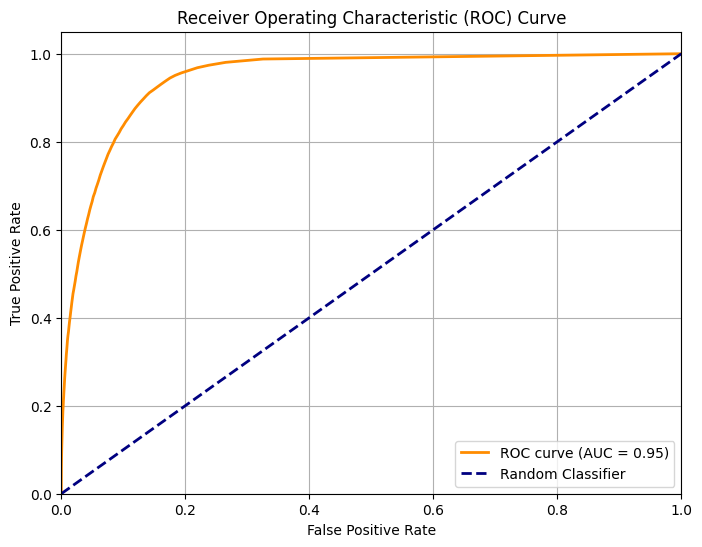

ROC AUC: 0.95


In [12]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC: {roc_auc:.2f}")

In [13]:
import numpy as np

G_means = np.sqrt(tpr * (1 - fpr))
optimal_idx = np.argmax(G_means)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold (maximizing G-mean): {optimal_threshold:.4f}")

y_pred_val_optimized = (y_pred_proba >= optimal_threshold).astype(int)

accuracy_opt = accuracy_score(y_val, y_pred_val_optimized)
precision_opt = precision_score(y_val, y_pred_val_optimized)
recall_opt = recall_score(y_val, y_pred_val_optimized)
f1_opt = f1_score(y_val, y_pred_val_optimized)

print(f"\nMetrics with optimal threshold ({optimal_threshold:.4f}):")
print(f"  Accuracy: {accuracy_opt:.2f}")
print(f"  Precision: {precision_opt:.2f}")
print(f"  Recall: {recall_opt:.2f}")
print(f"  F1-score: {f1_opt:.2f}")


Optimal threshold (maximizing G-mean): 0.1300

Metrics with optimal threshold (0.1300):
  Accuracy: 0.86
  Precision: 0.47
  Recall: 0.91
  F1-score: 0.62


In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [16]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

y_pred_proba_lr = lr_model.predict_proba(X_val)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, y_pred_proba_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)

print(f"Logistic Regression ROC AUC: {roc_auc_lr:.2f}")

G_means_lr = np.sqrt(tpr_lr * (1 - fpr_lr))
optimal_idx_lr = np.argmax(G_means_lr)
optimal_threshold_lr = thresholds_lr[optimal_idx_lr]

print(f"Optimal threshold for Logistic Regression (maximizing G-mean): {optimal_threshold_lr:.4f}")

y_pred_val_optimized_lr = (y_pred_proba_lr >= optimal_threshold_lr).astype(int)

accuracy_lr = accuracy_score(y_val, y_pred_val_optimized_lr)
precision_lr = precision_score(y_val, y_pred_val_optimized_lr)
recall_lr = recall_score(y_val, y_pred_val_optimized_lr)
f1_lr = f1_score(y_val, y_pred_val_optimized_lr)

print(f"\nLogistic Regression Metrics with optimal threshold ({optimal_threshold_lr:.4f}):")
print(f"  Accuracy: {accuracy_lr:.2f}")
print(f"  Precision: {precision_lr:.2f}")
print(f"  Recall: {recall_lr:.2f}")
print(f"  F1-score: {f1_lr:.2f}")

Logistic Regression ROC AUC: 0.65
Optimal threshold for Logistic Regression (maximizing G-mean): 0.1878

Logistic Regression Metrics with optimal threshold (0.1878):
  Accuracy: 0.58
  Precision: 0.16
  Recall: 0.60
  F1-score: 0.26


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

print("Gradient Boosting Classifier model trained successfully.")

y_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_val, y_pred_proba_gb)

roc_auc_gb = auc(fpr_gb, tpr_gb)

print(f"\nGradient Boosting Classifier ROC AUC: {roc_auc_gb:.2f}")

Gradient Boosting Classifier model trained successfully.

Gradient Boosting Classifier ROC AUC: 0.95


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

G_means_gb = np.sqrt(tpr_gb * (1 - fpr_gb))
optimal_idx_gb = np.argmax(G_means_gb)
optimal_threshold_gb = thresholds_gb[optimal_idx_gb]

print(f"Optimal threshold for Gradient Boosting (maximizing G-mean): {optimal_threshold_gb:.4f}")

y_pred_val_optimized_gb = (y_pred_proba_gb >= optimal_threshold_gb).astype(int)

accuracy_gb = accuracy_score(y_val, y_pred_val_optimized_gb)
precision_gb = precision_score(y_val, y_pred_val_optimized_gb)
recall_gb = recall_score(y_val, y_pred_val_optimized_gb)
f1_gb = f1_score(y_val, y_pred_val_optimized_gb)

print(f"\nGradient Boosting Metrics with optimal threshold ({optimal_threshold_gb:.4f}):")
print(f"  Accuracy: {accuracy_gb:.2f}")
print(f"  Precision: {precision_gb:.2f}")
print(f"  Recall: {recall_gb:.2f}")
print(f"  F1-score: {f1_gb:.2f}")

Optimal threshold for Gradient Boosting (maximizing G-mean): 0.1362

Gradient Boosting Metrics with optimal threshold (0.1362):
  Accuracy: 0.86
  Precision: 0.46
  Recall: 0.91
  F1-score: 0.61


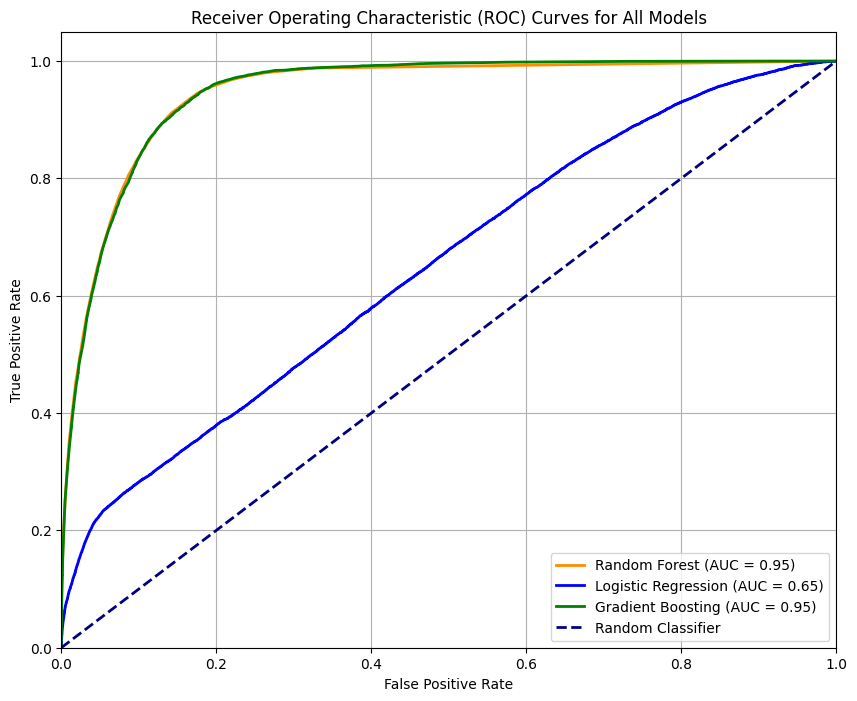

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curves for All Models')

plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [20]:
import pandas as pd

y_pred_proba_final = gb_model.predict_proba(test_df)[:, 1]

final_submission_df = pd.DataFrame({
    'id': test_df['id'],
    'y': y_pred_proba_final
})

final_submission_df.to_csv('final_submission.csv', index=False)

print("Final submission file 'final_submission.csv' created successfully using the Gradient Boosting Classifier.")
print("First 5 rows of the final submission file:")
print(final_submission_df.head())

print("\nValue counts of predictions (probabilities) on the final submission file:")
print(final_submission_df['y'].describe())

Final submission file 'final_submission.csv' created successfully using the Gradient Boosting Classifier.
First 5 rows of the final submission file:
       id         y
0  750000  0.026682
1  750001  0.111735
2  750002  0.004322
3  750003  0.002524
4  750004  0.043094

Value counts of predictions (probabilities) on the final submission file:
count    250000.000000
mean          0.120642
std           0.219703
min           0.002396
25%           0.004229
50%           0.008031
75%           0.118192
max           0.988145
Name: y, dtype: float64
